# Quick intro to `numpy`
### MCS 275 Spring 2022 - Emily Dumas

This is a quick tour of some `numpy` features.  For more detail see:
* [Chapter 2 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)
* [The numpy documentation](https://numpy.org/doc/stable/)

## Import the module

None of the code below will work without this!

In [1]:
import numpy as np
np.__version__

'1.22.2'

## Making and using arrays

[List of built-in dtypes](https://numpy.org/doc/stable/reference/arrays.scalars.html#arrays-scalars-built-in).

In [74]:
# all zeros, specified shape
np.zeros( (2,3) )

array([[0., 0., 0.],
       [0., 0., 0.]])

In [75]:
# all ones, specified shape
np.ones( (8,) )

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# array with every entry equal to a given constant
np.full( (3,3), 1.7 )  # shape, value

In [ ]:
A = np.ones( (4,4) )
A.ndim  # the dimension of A

In [ ]:
A.shape # the shape of A

In [ ]:
A.size # the number of elements in A

In [ ]:
A.dtype # the data type (np.ones gives float64 by default)

In [ ]:
B = np.full( (2,3), 6 )  # Python int given, converted to int64
B.dtype

In [ ]:
# Build array from an iterable
C = np.array( [[5,6,7,8],[9,10,11,12]] )

In [ ]:
print(C.ndim)
print(C.dtype)
print(C.size)

In [ ]:
# np.random.random(shape) gives array of uniformly distributed
# random floats 0<=x<1
np.random.random((5,8))

In [ ]:
np.ones((2,2),dtype="bool")  # numpy supports boolean arrays
# coerces 0 to False and 1 to True

In [76]:
Abyte = np.zeros((4,3),dtype="uint8")  # Array of 1-byte values
Abyte

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [77]:
Abyte[1,1] = 10
Abyte[3,2] = 300
Abyte

array([[ 0,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  0],
       [ 0,  0, 44]], dtype=uint8)

### Arithmetic progressions

* `np.arange` is start, stop, step
* `np.linspace` is first, last, nstep

In [39]:
np.arange(3,13,2) # stop will not be included

array([ 3,  5,  7,  9, 11])

In [40]:
np.arange(3,5,0.1)

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [43]:
np.linspace(2,6,4)

array([2.        , 3.33333333, 4.66666667, 6.        ])

## Accessing elements (indexing and slices)

In [83]:
A = np.array(range(24)).reshape((4,6))   # 0..23 in a vector, but then convert to 4x6 matrix
v = np.arange(1,5,1.2) # vector (array with ndim=1)

In [84]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [ ]:
v

In [ ]:
v[1] # element at index 1 (zero-based)

In [ ]:
v[-2] # second to last element

In [ ]:
A[2,0]  # row 2, column 0

In [85]:
A[:,2]  # column 2 of A  (remember, 0-based numbering!)
# I think of this as A[anything,2]

array([ 2,  8, 14, 20])

In [86]:
A[1,:]  # row 1 of A
# I think of this as A[1,anything]

array([ 6,  7,  8,  9, 10, 11])

In [87]:
A[1] # another way to specify row 1 of A
# missing indices are treated as ":"

array([ 6,  7,  8,  9, 10, 11])

In [ ]:
A[::2,1:3]  # all rows of even index, columns 1 and 2

## Vector math

Vectors are 1D arrays

In [114]:
v = np.array([1.5,2.5,1])
v

array([1.5, 2.5, 1. ])

In [115]:
w = np.array([-0.5,3,0])
w

array([-0.5,  3. ,  0. ])

In [117]:
2.1*v # elementwise multiplication

array([3.15, 5.25, 2.1 ])

In [118]:
v+w

array([1. , 5.5, 1. ])

In [119]:
v*w   # There's a good chance this isn't what you want.

array([-0.75,  7.5 ,  0.  ])

In [120]:
v.dot(w)

6.75

## Matrices

Matrices are 2D arrays

In [121]:
M = np.eye(3)
M

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [122]:
M[1] = np.linspace(10,20,3)
M

array([[ 1.,  0.,  0.],
       [10., 15., 20.],
       [ 0.,  0.,  1.]])

In [123]:
6*M

array([[  6.,   0.,   0.],
       [ 60.,  90., 120.],
       [  0.,   0.,   6.]])

In [124]:
M.T  # transpose reverses the order of the axes; M.T[j,k] is M[k,j]

array([[ 1., 10.,  0.],
       [ 0., 15.,  0.],
       [ 0., 20.,  1.]])

## Ufuncs

In [125]:
# Let's make an array to work with
A = np.array(range(1,16)).reshape((3,5))
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [126]:
1 / A  # reciprocal of each entry in the matrix

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667]])

In [127]:
A**2 # square of each entry

array([[  1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100],
       [121, 144, 169, 196, 225]])

In [128]:
np.sin(A) # apply sin() to each entry

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111],
       [-0.99999021, -0.53657292,  0.42016704,  0.99060736,  0.65028784]])

In [129]:
# first 11 cubes
np.arange(1,12)**3  # make vector of 1..11 and then cube each entry

array([   1,    8,   27,   64,  125,  216,  343,  512,  729, 1000, 1331])

## Broadcasting

If a higher-dimensional array is needed for an operation, produce one by duplication.

In [143]:
A = np.full((3,4),5,dtype="float")
A[1] = 11
A

array([[ 5.,  5.,  5.,  5.],
       [11., 11., 11., 11.],
       [ 5.,  5.,  5.,  5.]])

In [144]:
5+A

array([[10., 10., 10., 10.],
       [16., 16., 16., 16.],
       [10., 10., 10., 10.]])

In [141]:
v = np.array( [1,2,3,4], dtype="float")
v

array([1., 2., 3., 4.])

In [145]:
    A   +   v    # add v to each row of A
# 3x4   (3x)4

array([[ 6.,  7.,  8.,  9.],
       [12., 13., 14., 15.],
       [ 6.,  7.,  8.,  9.]])

In [147]:
B = np.zeros( (6,6) )
B[::2,1:5] = 7

In [148]:
B

array([[0., 7., 7., 7., 7., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 7., 7., 7., 7., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 7., 7., 7., 7., 0.],
       [0., 0., 0., 0., 0., 0.]])

## Stacking and joining

In [149]:
A = np.arange(1,10).reshape((3,3))
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [150]:
B = np.array( [ [10,20,30], [19,23,56]])
B

array([[10, 20, 30],
       [19, 23, 56]])

In [151]:
C = np.array( [ [2,1], [1,1] ])
C

array([[2, 1],
       [1, 1]])

In [152]:
np.vstack([A,A])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [153]:
np.hstack([A,A])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]])

## Aggregation functions

In [155]:
v = np.arange(15)
v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [156]:
np.sum(v)

105

In [157]:
np.max(v)

14

In [158]:
np.mean(v)

7.0

In [160]:
np.all(v)  # are all of the elements True / nonzero?

False

In [163]:
np.any(v)  # is there at least one True / nonzero element

True

## Grids

Suppose we want to consider a rectangular grid of points in the plane.  Numpy has a function to take a list of x values, a list of y values, and then return all possible pairs of x and y from these lists in a convenient form.

In [171]:
x = np.linspace(-1,1,11)
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [172]:
y = np.linspace(0,2,6)
y

array([0. , 0.4, 0.8, 1.2, 1.6, 2. ])

In [174]:
xx,yy = np.meshgrid(x,y)  # will return two len(y) x len(x) arrays
# xx will be constant along columns (values from x along rows)
# yy will be constant along rows (values from y along columns)

In [175]:
xx

array([[-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       [-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]])

In [176]:
yy

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ]])

## Boolean arrays and masks

In [189]:
# A is the sum of two matrices:
# 4x4 zeros, add [0,1,2,3] to each row, take the transpose
# 4x4 zeros, add [0,2,4,6] to each row
A = (np.zeros((4,4))+np.arange(4)).T + (np.zeros((4,4))+np.arange(0,8,2))

# -3 to 3
v = np.arange(-3,4)

w = np.array([-2,-2,0,0,4,5,5])

In [190]:
A

array([[0., 2., 4., 6.],
       [1., 3., 5., 7.],
       [2., 4., 6., 8.],
       [3., 5., 7., 9.]])

In [193]:
v

array([-3, -2, -1,  0,  1,  2,  3])

In [194]:
w

array([-2, -2,  0,  0,  4,  5,  5])

In [195]:
v==w

array([False,  True, False,  True, False, False, False])

In [196]:
v>w

array([False, False, False, False, False, False, False])

In [197]:
v<w

array([ True, False,  True, False,  True,  True,  True])

In [198]:
A == np.zeros((4,4))

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [199]:
A

array([[0., 2., 4., 6.],
       [1., 3., 5., 7.],
       [2., 4., 6., 8.],
       [3., 5., 7., 9.]])

In [200]:
mask = np.array( [True, True, False, False, False, True, False])

In [201]:
mask.dtype

dtype('bool')

In [202]:
v

array([-3, -2, -1,  0,  1,  2,  3])

In [203]:
v[mask] # 1D array of all the entries in v where mask is True

array([-3, -2,  2])

In [206]:
mask2d = np.zeros((4,4),dtype="bool")
mask2d[0,0] = True
mask2d[2,3] = True
mask2d

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False]])

In [207]:
A[mask2d]

array([0., 8.])

In [208]:
v

array([-3, -2, -1,  0,  1,  2,  3])

In [209]:
mask

array([ True,  True, False, False, False,  True, False])

In [210]:
v[mask] = 275

In [211]:
v

array([275, 275,  -1,   0,   1, 275,   3])

In [212]:
# -3 to 3
v = np.arange(-3,4)

In [213]:
v

array([-3, -2, -1,  0,  1,  2,  3])

In [214]:
v[mask]+=1
# v[mask] = v[mask] + 1
#           ^^^^^^^^^^^ broadcasting

In [215]:
v

array([-2, -1, -1,  0,  1,  3,  3])

In [216]:
v[v<0] = 0

In [217]:
v

array([0, 0, 0, 0, 1, 3, 3])

In [218]:
A

array([[0., 2., 4., 6.],
       [1., 3., 5., 7.],
       [2., 4., 6., 8.],
       [3., 5., 7., 9.]])

In [219]:
A[A%2==0] = 42
A

array([[42., 42., 42., 42.],
       [ 1.,  3.,  5.,  7.],
       [42., 42., 42., 42.],
       [ 3.,  5.,  7.,  9.]])

In [220]:
np.any(A<0)  # Does A have any entries that are negative?

False

## Pillow integration

* `np.array(img)` just works, if `img` is a `PIL.Image` object
* Use `PIL.Image.fromarray(A)` to make an image from an array
    * Shape `(height,width)` and dtype `uint8` for grayscale
    * Shaape `(height,width,3)` and dtype `uint8` for color (last axis is red, green, blue)

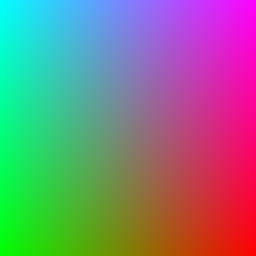

In [14]:
import numpy as np
from PIL import Image

grid_of_zeros = np.zeros( (256,256) )

# Make the red data: more red as you go to the right
r = np.arange(256) + grid_of_zeros  # broadcasting makes this 256x256

# Make the green data: more green as you go to the left
g = 255 - np.arange(256) + grid_of_zeros # broadcasting makes this 256x256

# Make the blue data: More blue at the top
b = (255 - np.arange(256) + grid_of_zeros).T

# Stack these three "planes" into an array of size 256x256x3
# Note the `axis=2` is needed so they are stacked with the size-3 dimension
# being the last one.  If we omit this you get the same data but as 256x256x3
imgdata = np.stack([r,g,b],axis=2).astype("uint8")

# Make an image out of it
Image.fromarray(imgdata)